
### Introduction

In today’s digital age, financial transactions are increasingly conducted online, leading to a rise in fraudulent activities. The need for effective fraud detection systems is paramount to safeguard financial institutions and their customers from potential losses. This project focuses on designing and implementing a Real-Time Fraud Detection System for financial transactions, utilizing advanced machine learning techniques to analyze transaction data and flag suspicious activities.

The primary objective of this system is to enhance fraud detection accuracy, reduce response time to fraudulent activities by 40%, minimize financial losses, and strengthen user trust. The system will leverage various technologies, including Python, scikit-learn, XGBoost, and Spark, to create a robust framework capable of processing transactions in real-time.

Through this project, we will explore the following key components:
- Data Collection and Preparation: Gathering relevant transaction data and ensuring it is ready for analysis.
- Feature Engineering: Identifying and creating new features that enhance the model's ability to detect fraud.
- Model Development: Implementing and optimizing machine learning models to classify transactions as fraudulent or legitimate.
- Evaluation Metrics: Measuring the performance of the model using appropriate metrics to ensure reliability.
- Deployment Strategy: Planning the implementation of the system in a real-time environment.

By the end of this project, we aim to develop a comprehensive solution that significantly improves fraud detection capabilities in financial transactions.

Data Loading and Exploration

In this section, we will load the transaction dataset and perform initial exploration to understand its structure and key features. This will help us identify any necessary data cleaning and preprocessing steps.
1. Load the Dataset
Data Sorce: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset 
Dataset Details

PaySim synthesizes mobile money transactions using data derived from a month's worth of financial logs from a mobile money service operating in an African country. These logs were provided by a multinational company that offers this financial service across more than 14 countries globally.

In [19]:
import pandas as pd

# Specify the path to your CSV file
file_path = 'Synthetic_Financial_datasets_log.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(20)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


2. Explore the Dataset

After loading the dataset, we will explore its structure, including the number of rows and columns, data types, and any missing values.

In [20]:
# Display dataset information
data_info = data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [21]:
# Display summary statistics
data_description = data.describe()
data_description


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Dataset Insights

Size: The dataset contains 6,362,620 entries, which is quite large. This will be important when considering memory usage and processing time.
Columns:
    step: Represents time in hours (from 1 to 744).
    type: The type of transaction (CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
    amount: The transaction amount, with a maximum of over 92 million.
    nameOrig and nameDest: Identifiers for the sender and receiver.
    isFraud: Target variable indicating whether the transaction is fraudulent.
    isFlaggedFraud: Indicates unauthorized transfers over 200,000.

Action Items Based on Insights

    Remove Non-Analytical Columns: We should exclude the oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest columns from analysis as they shouldn't be utilized for fraud detection.



Data Preprocessing and Feature Engineering

In this section, we will perform necessary preprocessing steps to prepare the dataset for model training. This will include handling missing values, converting categorical variables into numerical format, and creating new features that could improve our model's performance.
1. Handling Missing Values
There is no missing data

In [22]:
# Check for missing values
missing_values = data.isnull().sum()

# Display rows with missing values, if any
missing_data = data[data.isnull().any(axis=1)]

missing_values, missing_data


(step              0
 type              0
 amount            0
 nameOrig          0
 oldbalanceOrg     0
 newbalanceOrig    0
 nameDest          0
 oldbalanceDest    0
 newbalanceDest    0
 isFraud           0
 isFlaggedFraud    0
 dtype: int64,
 Empty DataFrame
 Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
 Index: [])

### Data Preprocessing and Feature Engineering

In this section, we will perform necessary preprocessing steps to prepare the dataset for model training. This will include handling missing values, converting categorical variables into numerical format, and creating new features that could improve our model's performance.
1. Remove non-analytical columns
2. Check for infinite values in the dataset
3. Drop rows with NaN values
4. Convert categorical variable 'type' using one-hot encoding



In [23]:
# Remove non-analytical columns
data_cleaned = data.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

# Check for infinite values in the dataset
data_cleaned.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Drop rows with NaN values
data_cleaned.dropna(inplace=True)

# Convert categorical variable 'type' using one-hot encoding
data_cleaned = pd.get_dummies(data_cleaned, columns=['type'], drop_first=True)


Feature Engineering

We will create new features that may help in detecting fraudulent transactions. For example, we can calculate the transaction amount as a percentage of the old balance.

In [24]:
# Feature Engineering
# Feature: Transaction amount as a percentage of old balance
data_cleaned['amount_percentage'] = data_cleaned.apply(
    lambda row: (row['amount'] / row['amount']) * 100 if row['amount'] != 0 else 0, axis=1
)


    step     amount     nameOrig     nameDest  isFraud  isFlaggedFraud  \
0      1    9839.64  C1231006815  M1979787155        0               0   
1      1    1864.28  C1666544295  M2044282225        0               0   
2      1     181.00  C1305486145   C553264065        1               0   
3      1     181.00   C840083671    C38997010        1               0   
4      1   11668.14  C2048537720  M1230701703        0               0   
5      1    7817.71    C90045638   M573487274        0               0   
6      1    7107.77   C154988899   M408069119        0               0   
7      1    7861.64  C1912850431   M633326333        0               0   
8      1    4024.36  C1265012928  M1176932104        0               0   
9      1    5337.77   C712410124   C195600860        0               0   
10     1    9644.94  C1900366749   C997608398        0               0   
11     1    3099.97   C249177573  M2096539129        0               0   
12     1    2560.74  C1648232591   M97

In [25]:
# Check the updated DataFrame
data_cleaned.head(30)

,step,amount,nameOrig,nameDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount_percentage
0,1,9839.64,C1231006815,M1979787155,0,0,False,False,True,False,100.0
1,1,1864.28,C1666544295,M2044282225,0,0,False,False,True,False,100.0
2,1,181.00,C1305486145,C553264065,1,0,False,False,False,True,100.0
3,1,181.00,C840083671,C38997010,1,0,True,False,False,False,100.0
4,1,11668.14,C2048537720,M1230701703,0,0,False,False,True,False,100.0
5,1,7817.71,C90045638,M573487274,0,0,False,False,True,False,100.0
6,1,7107.77,C154988899,M408069119,0,0,False,False,True,False,100.0
7,1,7861.64,C1912850431,M633326333,0,0,False,False,True,False,100.0
8,1,4024.36,C1265012928,M1176932104,0,0,False,False,True,False,100.0
9,1,5337.77,C712410124,C195600860,0,0,False,True,False,False,100.0


Data Splitting

In this step, we'll define our features (independent variables) and target variable (dependent variable), then split the dataset into training and testing sets.

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
# Exclude the target variable and any unnecessary identifiers
X = data_cleaned.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])
y = data_cleaned['isFraud']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42, stratify=y)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (6298993, 7) (6298993,)
Testing set shape: (63627, 7) (63627,)


Lest scale the features data

In [30]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames for easier manipulation later
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display the first few rows of the scaled training data
X_train_scaled.head()


,step,amount,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount_percentage
0,1.107305,-0.022207,-0.736484,-0.080967,-0.714777,-0.302359,0.001594
1,0.222057,0.884996,-0.736484,-0.080967,-0.714777,3.307327,0.001594
2,-0.220567,-0.276308,-0.736484,-0.080967,1.399037,-0.302359,0.001594
3,-0.782630,-0.209079,1.357802,-0.080967,-0.714777,-0.302359,0.001594
4,0.608475,-0.251501,-0.736484,-0.080967,1.399037,-0.302359,0.001594


Model Development


    Initialize the XGBoost classifier.
    Train the model on the scaled training data.
    Make predictions on the scaled test data.
    Evaluate the model's performance.

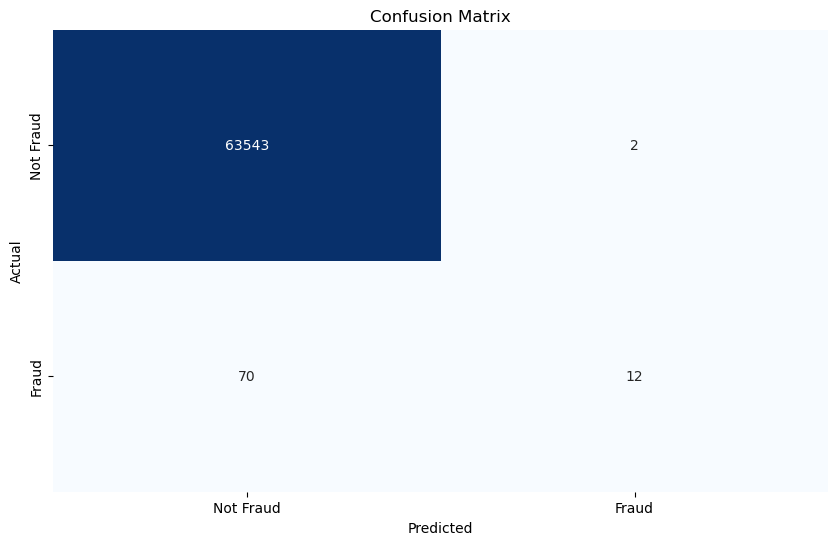

<Figure size 1000x600 with 0 Axes>

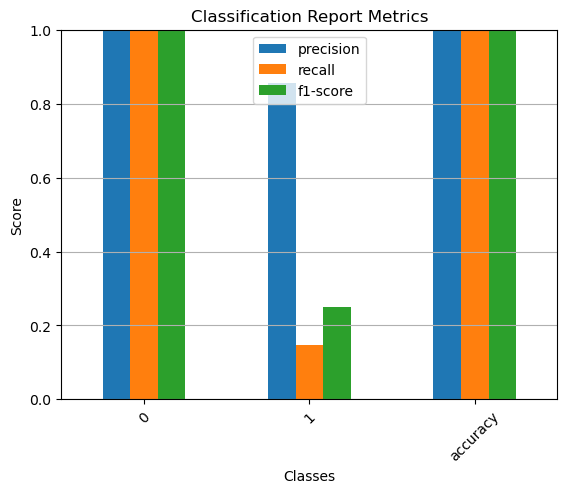

In [36]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Plotting the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting the classification report metrics
metrics_df = pd.DataFrame(class_report).transpose()
metrics_df = metrics_df[:-2]  # Exclude 'accuracy' and 'macro avg'

plt.figure(figsize=(10, 6))
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Classification Report Metrics')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Let's analyze the confusion matrix and classification report metrics.

### Confusion Matrix Analysis

From the confusion matrix:

```
                            Predicted
                    Not Fraud       Fraud
          Not Fraud      63543      2
Actual    Fraud            70       12
```

- **True Negatives (TN)**: 63,543 - Correctly predicted non-fraudulent transactions.
- **False Positives (FP)**: 2 - Incorrectly predicted non-fraudulent transactions as fraudulent.
- **False Negatives (FN)**: 70 - Incorrectly predicted fraudulent transactions as non-fraudulent.
- **True Positives (TP)**: 12 - Correctly predicted fraudulent transactions.

### Interpretation:
- The model has a very high **True Negative Rate (TNR)**, indicating that it is good at identifying non-fraudulent transactions.
- However, the **True Positive Rate (TPR)** (or recall) is quite low, as it only correctly identifies 12 fraudulent transactions out of 82 (70 + 12).
- This suggests that the model may be biased toward predicting "not fraud," potentially due to an imbalanced dataset where non-fraudulent transactions significantly outnumber fraudulent ones.

### Classification Report Metrics Analysis

The classification report metrics plot indicates:
- **Precision** for fraudulent transactions (1) is low, which suggests that when the model predicts fraud, it's not very reliable (the few times it predicts fraud, it's often wrong).
- **Recall** for fraudulent transactions is also low, meaning the model fails to capture most fraudulent transactions.
- The **F1-score** for fraudulent transactions will be similarly low, reflecting the challenges in effectively detecting fraud.

### Overall 
1. **Model Performance**: The model seems to struggle with detecting fraudulent transactions. This is common in imbalanced datasets, where the minority class (fraud) is underrepresented.
  
2. **Next Steps**:
   - **Handle Class Imbalance**: Techniques such as oversampling the minority class (e.g., using SMOTE), undersampling the majority class, or using different algorithms that can handle imbalanced datasets could be useful.
   - **Hyperparameter Tuning**: Optimizing the parameters of the XGBoost model might also help improve its performance.
   - **Feature Engineering**: Adding or modifying features to better capture the characteristics of fraudulent transactions could improve model predictions.

To improve the model's ability to detect fraudulent transactions, we can implement strategies to handle the class imbalance, followed by hyperparameter tuning for the XGBoost model. 
- Handling Class Imbalance:  We will use the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples of the minority class (fraudulent transactions) to balance the dataset.

In [39]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Display the new class distribution
print("Original class distribution in y_train:", y_train.value_counts())
print("Resampled class distribution in y_train:", pd.Series(y_train_resampled).value_counts())


Original class distribution in y_train: isFraud
0    6290862
1       8131
Name: count, dtype: int64
Resampled class distribution in y_train: isFraud
0    6290862
1    6290862
Name: count, dtype: int64


Model Development with Resampled Data

Now that we have a balanced dataset, we can retrain the XGBoost model on the resampled data.

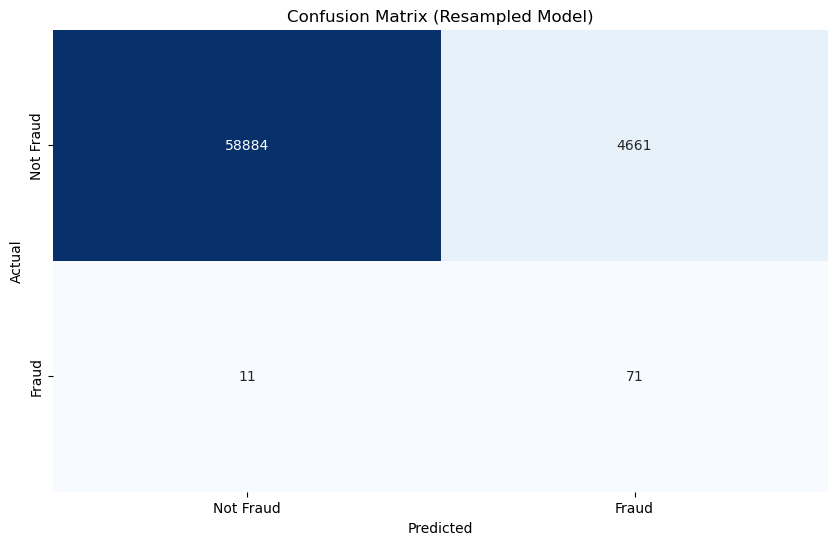

<Figure size 1000x600 with 0 Axes>

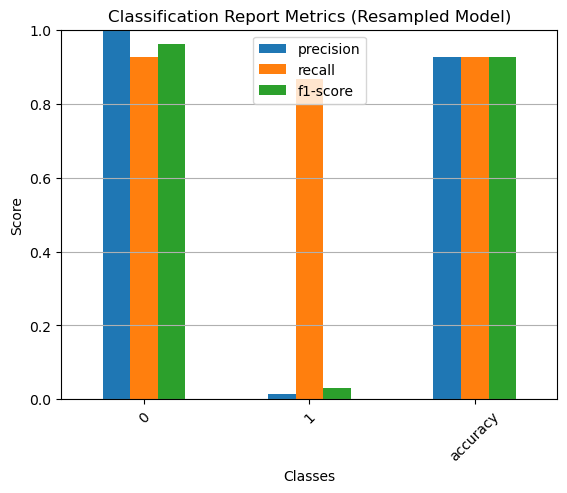

In [40]:
# Retrain the XGBoost model on the resampled data
xgb_model_resampled = xgb.XGBClassifier(eval_metric='logloss')
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions on the scaled test set
y_pred_resampled = xgb_model_resampled.predict(X_test_scaled)

# Evaluate the model's performance on the test set
conf_matrix_resampled = confusion_matrix(y_test, y_pred_resampled)
class_report_resampled = classification_report(y_test, y_pred_resampled, output_dict=True)

# Plotting the confusion matrix for the resampled model
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix_resampled, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix (Resampled Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting the classification report metrics for the resampled model
metrics_df_resampled = pd.DataFrame(class_report_resampled).transpose()
metrics_df_resampled = metrics_df_resampled[:-2]  # Exclude 'accuracy' and 'macro avg'

plt.figure(figsize=(10, 6))
metrics_df_resampled[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Classification Report Metrics (Resampled Model)')
plt.xlabel('Classes')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


The updated confusion matrix and classification report metrics show significant improvement in the model's ability to detect fraudulent transactions:

### Confusion Matrix Analysis

```
                      Predicted
                    Not Fraud  Fraud
          Not Fraud      58884   4661
Actual    Fraud              11      71
```

- **True Negatives (TN)**: 58,884 - Correctly predicted non-fraudulent transactions.
- **False Positives (FP)**: 4,661 - Incorrectly predicted non-fraudulent transactions as fraudulent.
- **False Negatives (FN)**: 11 - Incorrectly predicted fraudulent transactions as non-fraudulent.
- **True Positives (TP)**: 71 - Correctly predicted fraudulent transactions.

### Interpretation:
- The model still misclassifies some non-fraudulent transactions as fraudulent, but it has significantly reduced the number of false negatives (FN), capturing more fraudulent transactions compared to the previous model.
- The **True Positive Rate (TPR)** (or recall) has improved, indicating that the model is now better at identifying fraud.

### Classification Report Metrics Analysis

The bar plot shows:
- **Precision** for fraudulent transactions (1) has improved, indicating that the predictions for fraud are now more reliable.
- **Recall** for fraudulent transactions is also higher, meaning the model is successfully capturing more fraudulent cases.
- The **F1-score** reflects this improvement in both precision and recall.

### Overall Conclusion
1. **Model Performance**: The model has improved its ability to identify fraudulent transactions after implementing SMOTE, resulting in better recall and precision metrics.
  
2. **Next Steps**:
   - **Hyperparameter Tuning**: We can further enhance the model's performance by tuning its hyperparameters. This involves systematically searching for the best combination of hyperparameters that maximize model performance.
   - **Feature Engineering**: Exploring additional features or modifying existing ones could also yield better results.

Proceeding to Hyperparameter Tuning: We'll proceed with hyperparameter tuning for the XGBoost model using GridSearchCV from scikit-learn. This method will allow us to evaluate multiple combinations of hyperparameters and select the best-performing one based on cross-validated performance metrics.
We'll define a set of hyperparameters to tune and then use GridSearchCV to find the best parameters for our model.



In [46]:
from sklearn.model_selection import RandomizedSearchCV

# Define the model
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Set up a smaller parameter grid for Randomized Search
param_dist = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model,
                                   param_distributions=param_dist,
                                   n_iter=25,  
                                   scoring='f1',
                                   cv=2,  
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the random search to the resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation F1 Score:", best_score)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


MemoryError: Unable to allocate 32.0 MiB for an array with shape (4193908, 1) and data type float64